# Linear regression

In [1]:
from numpy import *
from matplotlib.pyplot import figure
import sklearn
from sklearn.preprocessing import LabelEncoder

In [2]:
# Clean security_deposit  
def clean_dollar(df, feature):   
    try: 
        df[feature] = df[feature].str.replace("$","")
        df[feature] = df[feature].str.replace(",","")
        df[feature]  = pd.to_numeric(df[feature], downcast = 'float')
    except: 
        print("already converted")
        
# Clean percentage  
def clean_percentage(df, feature):   
    try: 
        df[feature] = df[feature].str.replace("%","")
        df[feature]  = pd.to_numeric(df[feature], downcast = 'float')
    except: 
        print("already converted")
        

## Loading data

In [3]:
from tqdm import tqdm
import numpy as np 
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
try: 
    # Paden Joran 
    calendar_detail = pd.read_csv("calendar_detail.csv")
    listings_detail = pd.read_csv("listings_detail.csv")
    listings_summary = pd.read_csv("listings_summary.csv")
    neighbourhoods = pd.read_csv("neighbourhoods.csv")
    reviews_detail = pd.read_csv("reviews_detail.csv")
    reviews_summary = pd.read_csv("reviews_summary.csv")
    with open('neighbourhoods.geojson') as f:
        neighbourhoods_geojson = json.load(f)
except: 
    print("Files not found")

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
cal_det_available = calendar_detail[calendar_detail['available'] == 't']
try: 
    cal_det_available['price'] = cal_det_available['price'].str.replace("$","")
    cal_det_available['price'] = cal_det_available['price'].str.replace(",","")
    cal_det_available.price = pd.to_numeric(cal_det_available.price, downcast = 'float')
except: 
    print("Already converted")

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Anaconda\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [5]:
# calendar_details 
calendar_detail.head()

,listing_id,date,available,price
0,2515,2018-10-01,t,$99.00
1,2515,2018-09-30,t,$89.00
2,2515,2018-09-29,t,$99.00
3,2515,2018-09-28,t,$99.00
4,2515,2018-09-27,t,$99.00


In [6]:
# listings_detail 
listings_detail.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,18461891,https://www.airbnb.com/rooms/18461891,20171002002103,2017-10-03,"Bright, comfortable 1B studio near everything!",*Looking to fill these specific dates: June 24...,Very well illuminated space includes comfortab...,*Looking to fill these specific dates: June 24...,none,There are Michelin-rated restaurants in the ar...,...,f,NaN,NaN,f,f,strict,f,f,1,NaN
1,20702398,https://www.airbnb.com/rooms/20702398,20171002002103,2017-10-03,Quiet house on City Island,1 private bedroom and bathroom available for o...,NaN,1 private bedroom and bathroom available for o...,none,This neighborhood is dope! Lot's of seafood re...,...,f,NaN,NaN,f,f,moderate,f,f,1,2.0


In [7]:
# listings_summary
listings_summary.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18461891,"Bright, comfortable 1B studio near everything!",916092,Connie Mae,Queens,Ditmars Steinway,40.774142,-73.916246,Entire home/apt,110,6,0,NaN,NaN,1,0
1,20702398,Quiet house on City Island,1457680,James,Bronx,City Island,40.849191,-73.786509,Private room,50,1,2,2017-10-01,2.00,1,169
2,6627449,Large 1 BDRM in Great location,13886510,Arlene,Bronx,City Island,40.849775,-73.786609,Entire home/apt,125,3,21,2017-09-26,0.77,1,363
3,19949243,Stay aboard a sailboat,1149260,MoMo,Bronx,City Island,40.848838,-73.782276,Entire home/apt,100,3,0,NaN,NaN,1,90
4,1886820,Quaint City Island Community.,9815788,Steve,Bronx,City Island,40.841144,-73.783052,Entire home/apt,300,7,0,NaN,NaN,1,365


In [8]:
# neighbourhoods
neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,Bronx,Allerton
1,Bronx,Baychester
2,Bronx,Belmont
3,Bronx,Bronxdale
4,Bronx,Castle Hill


In [9]:
# reviews_detail 
reviews_detail.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,9452127,58944174,2016-01-05,6279455,Ravi,Great place. Helena was prompt to reply and ve...
1,9452127,59446510,2016-01-10,23770684,Shiv,We had previously stayed at the apartment over...
2,9452127,59557387,2016-01-11,29070567,Jandall,Helena was a great host and extremely accommod...
3,9452127,62664325,2016-02-15,58381183,Cody,Helena was extremely accessible throughout the...
4,9452127,63410004,2016-02-22,29014080,Magnus,Awesome place! Looks just as in photos. Plenty...


In [10]:
# reviews_summary
reviews_summary.head()

,listing_id,date
0,9452127,2016-01-05
1,9452127,2016-01-10
2,9452127,2016-01-11
3,9452127,2016-02-15
4,9452127,2016-02-22


In [11]:
# neighbourhoods_geojson (remove # in next line to see the dictionary)
# neighbourhoods_geojson

#### 5.	Run a regression to explain the price per listing. (Hint: location, reviews, etc. may all explain this).

In [12]:
clean_dollar(listings_detail, 'price')

In [13]:
listings_detail.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

##### Inspect the features

###### host_response_time

In [14]:
listings_detail.host_response_time.unique()

array([nan, 'within an hour', 'within a few hours', 'a few days or more',
       'within a day'], dtype=object)

In [15]:
def plot_general_distribution(df, feature, xlabels = True):
    figure(num=None, figsize=(12, 6))
    val_counts = df[feature].value_counts(dropna=False)
    cats = np.array(list(val_counts.keys()))
    counts = list(val_counts)

    title = feature + ': counts'
    Ys = counts
    Xs = cats
    plt.bar(Xs, Ys)
    plt.title(title)
    plt.xlabel('Categories')
    plt.ylabel('counts')
    plt.xticks(Xs, Xs, rotation= 45)
    if xlabels == False:
        plt.tick_params(
            axis='x',          
            which='both',      
            bottom=False,      
            top=False,         
            labelbottom=False)
    plt.show()

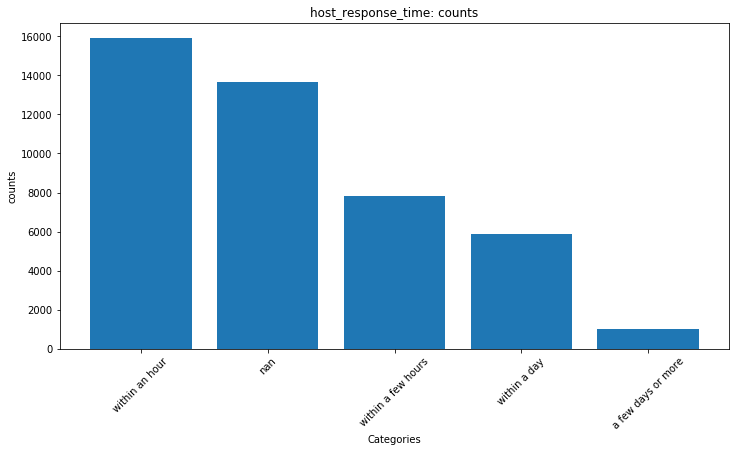

In [16]:
# Plot distribution
plot_general_distribution(listings_detail, 'host_response_time')

This field is very hard to use in a linear regression context due to the following reasons: 

    1. It is hard to ordinally scale these buckets since there will probably a different effect when going from 'within an 
    hour' to 'within a few hours'. However, the Linear Regression Model will attempt to attibute one single coefficient to 
    the entire variable.
    2. Even when trying to make a good ordinal sequence (eg within an hour = 0, within a few hours = 1, within a day = 3,
    within a few days or more) it is still hard to make sense of the NaN variables. How should we order them when we keep 
    them in the model? Leaving out the NaN values would mean that we leave out roughly 1/3 of the dataset and this is also 
    not interesting

###### host_response_rate

In [17]:
listings_detail.host_response_rate.unique()

array([nan, '100%', '33%', '75%', '84%', '90%', '80%', '0%', '70%', '99%',
       '50%', '69%', '88%', '71%', '67%', '89%', '83%', '60%', '14%',
       '86%', '56%', '97%', '98%', '91%', '78%', '95%', '87%', '57%',
       '38%', '96%', '94%', '20%', '73%', '93%', '40%', '17%', '82%',
       '25%', '79%', '92%', '63%', '58%', '43%', '77%', '29%', '30%',
       '44%', '36%', '53%', '64%', '85%', '81%', '74%', '10%', '76%',
       '46%', '65%', '27%', '54%', '55%', '66%', '68%', '21%', '61%',
       '72%', '26%', '22%', '15%', '52%', '6%', '41%', '47%', '35%',
       '62%', '59%'], dtype=object)

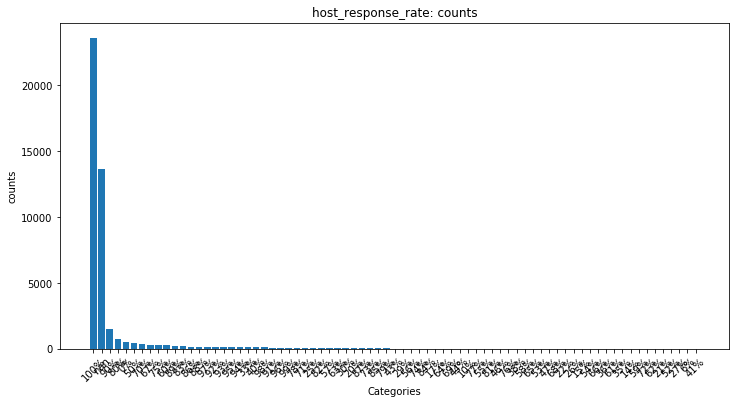

In [18]:
plot_general_distribution(listings_detail, 'host_response_rate')

In [19]:
sum(listings_detail['host_response_rate'].isnull()) / len(listings_detail)

0.30866258997675833

In [20]:
clean_percentage(listings_detail, 'host_response_rate')

In [21]:
# Less interesting to use at first sight. Might need some bucketing

###### host_is_superhost

In [22]:
listings_detail.host_is_superhost.unique()

array(['f', 't', nan], dtype=object)

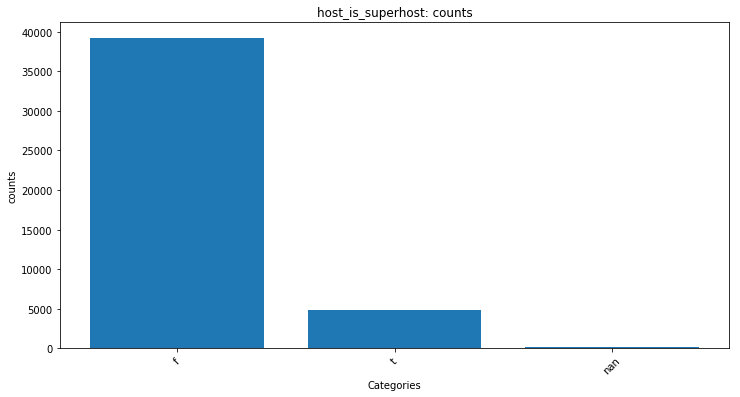

In [23]:
plot_general_distribution(listings_detail, 'host_is_superhost')

In [24]:
listings_detail['host_is_superhost'].fillna('f', inplace=True)
listings_detail['host_is_superhost'] = listings_detail['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)

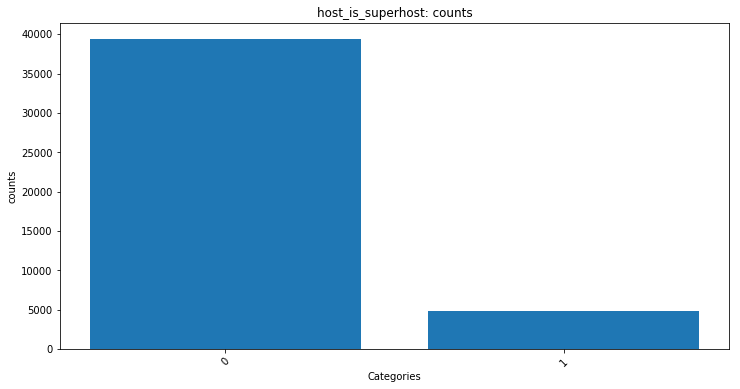

In [25]:
plot_general_distribution(listings_detail, 'host_is_superhost')

###### host_neighbourhood

In [26]:
len(listings_detail.host_neighbourhood.unique())

401

In [27]:
# This one can possibly be clustered before using it as a feature. This is out of scope for this report

###### host_listings_count

In [28]:
listings_detail[listings_detail.host_listings_count == 648]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
35957,18580576,https://www.airbnb.com/rooms/18580576,20171002002103,2017-10-03,Charming 1BR in the Upper East Side,At this Sonder you'll love the vibrant furnish...,Every booking is instantly confirmed. Every ca...,At this Sonder you'll love the vibrant furnish...,none,The Upper East Side has plenty to offer within...,...,f,NaN,NaN,t,t,strict,f,f,2,1.62
36219,18109722,https://www.airbnb.com/rooms/18109722,20171002002103,2017-10-02,Vibrant 4BR in Upper East Side,At this Sonder you'll love the mid-century dec...,Every booking is instantly confirmed. Every ca...,At this Sonder you'll love the mid-century dec...,none,The Upper East Side has plenty to offer within...,...,f,NaN,NaN,t,t,strict,f,f,2,3.14


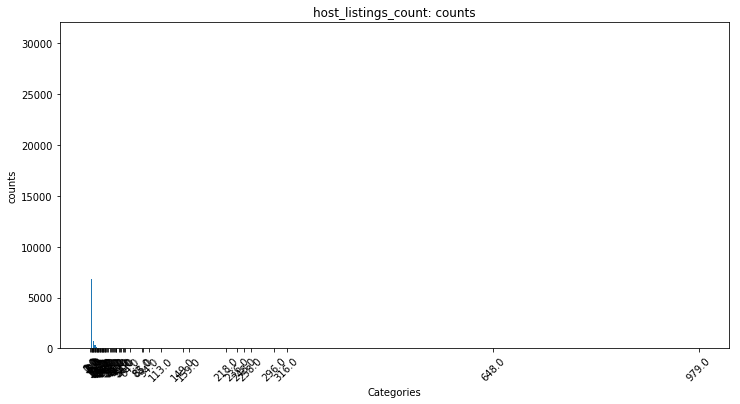

In [29]:
plot_general_distribution(listings_detail, 'host_listings_count')

In [30]:
# Try to clean the listings count 
grouped = listings_detail.groupby('host_id').count()['id']
grouped_df = pd.DataFrame({
    'host_id' : list(grouped.keys()),
    'host_listings_count_calculated' : list(grouped)
})
listings_detail = pd.merge(listings_detail, grouped_df, how = 'inner', on = 'host_id')

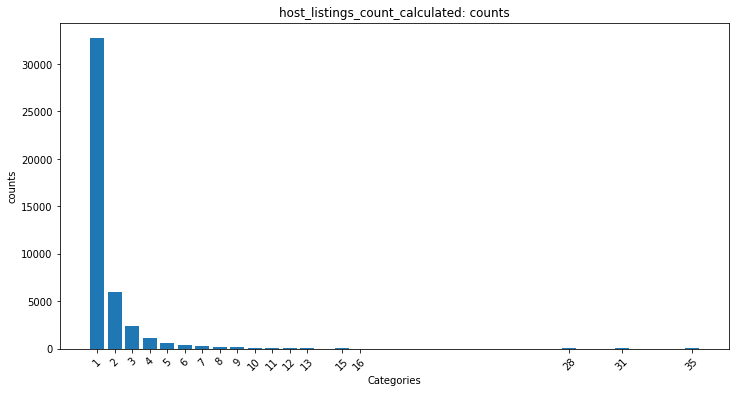

In [31]:
plot_general_distribution(listings_detail, 'host_listings_count_calculated')

######  host_total_listings_count

In [32]:
listings_detail.host_total_listings_count.unique()

array([  1.,   4.,   5.,   3.,   2.,   8.,   6.,   0.,  nan,  12.,  16.,
        11.,   9.,  24.,  14.,   7.,  20.,  15.,  10.,  19.,  47.,  23.,
        22.,  35.,  17.,  13.,  39., 236.,  27., 296.,  94., 979.,  18.,
        31.,  41.,  28., 159.,  46.,  21.,  49., 113.,  38.,  42.,  33.,
       258.,  54., 248.,  25.,  85., 316.,  52.,  64.,  56., 149., 648.,
        83.,  36., 218.])

In [33]:
# This is the same as above

###### host_has_profile_pic

In [34]:
listings_detail.host_has_profile_pic.unique()

array(['t', nan, 'f'], dtype=object)

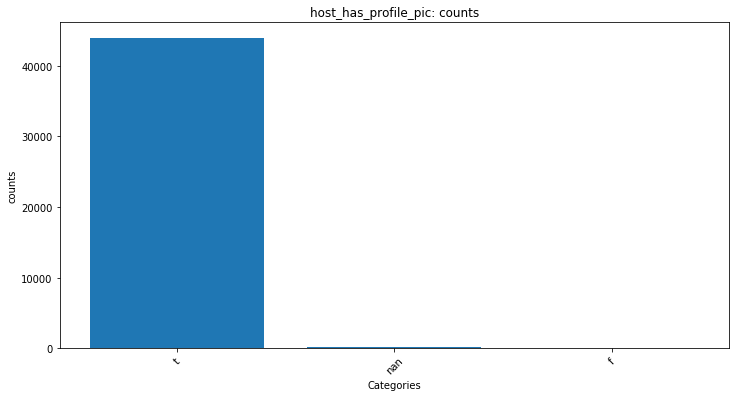

In [35]:
plot_general_distribution(listings_detail, 'host_has_profile_pic')

In [36]:
# Mostly true, so we don't expect this to add a lot of value 
listings_detail['host_has_profile_pic'].fillna('f', inplace=True)
listings_detail['host_has_profile_pic'] = listings_detail['host_has_profile_pic'].apply(lambda x: 1 if x == 't' else 0)

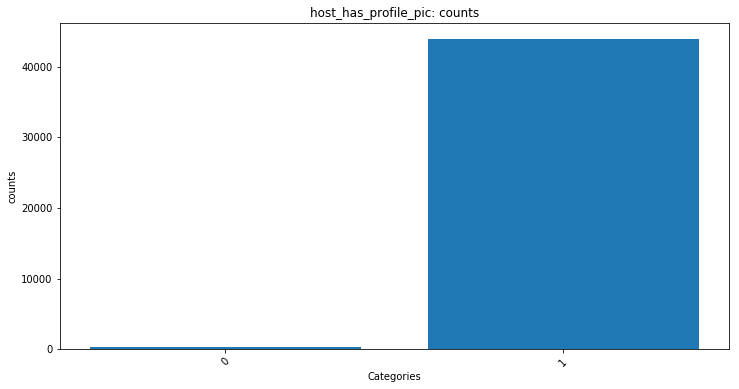

In [37]:
plot_general_distribution(listings_detail, 'host_has_profile_pic')

We don't expect much from this variable

###### host_identity_verified

In [38]:
listings_detail.host_identity_verified.unique()

array(['t', 'f', nan], dtype=object)

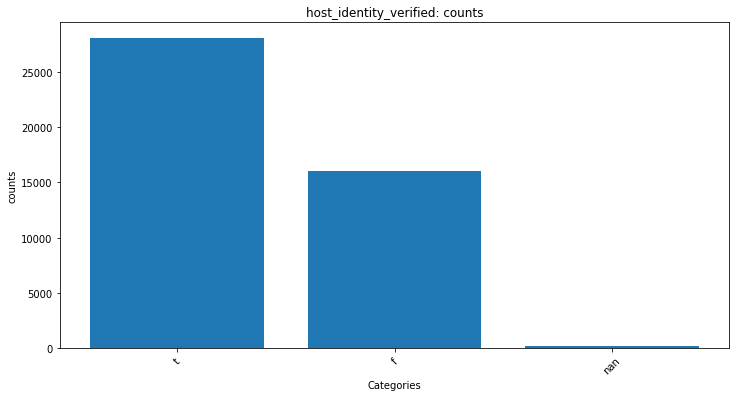

In [39]:
plot_general_distribution(listings_detail, 'host_identity_verified')

In [40]:
# Might lead to interesting results
listings_detail['host_identity_verified'].fillna('f', inplace=True)
listings_detail['host_identity_verified'] = listings_detail['host_identity_verified'].apply(lambda x: 1 if x == 't' else 0)

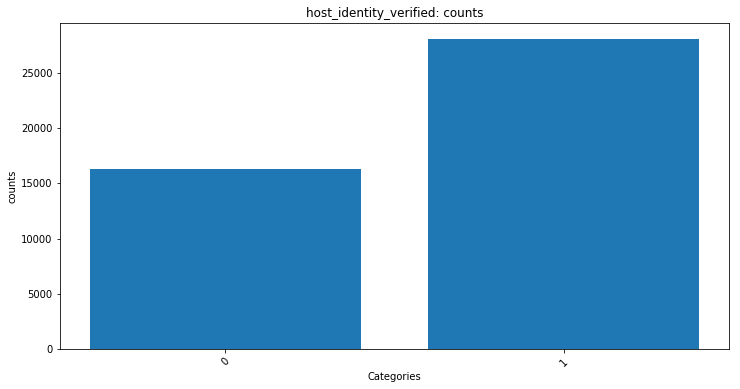

In [41]:
plot_general_distribution(listings_detail, 'host_identity_verified')

###### room_type

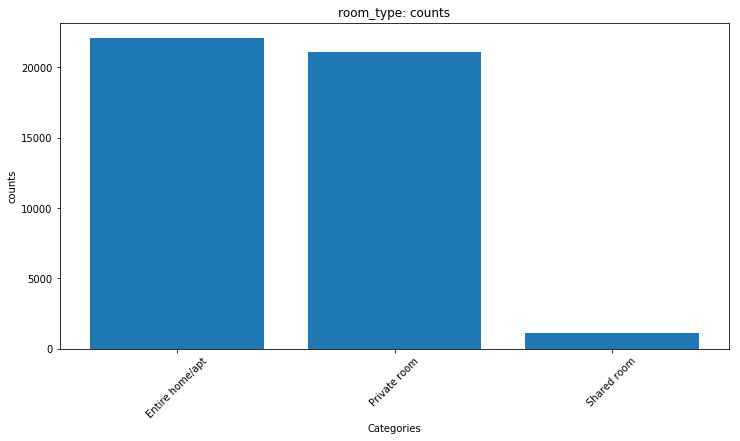

In [42]:
plot_general_distribution(listings_detail, 'room_type')

In [43]:
listings_detail['is_entire_home_or_apt'] = listings_detail['room_type'].apply(lambda x: 1 if x == 'Entire home/apt' else 0)
listings_detail['is_private_room'] = listings_detail['room_type'].apply(lambda x: 1 if x == 'Private room' else 0)
listings_detail['is_shared_room'] = listings_detail['room_type'].apply(lambda x: 1 if x == 'Shared room' else 0)

###### accommodates

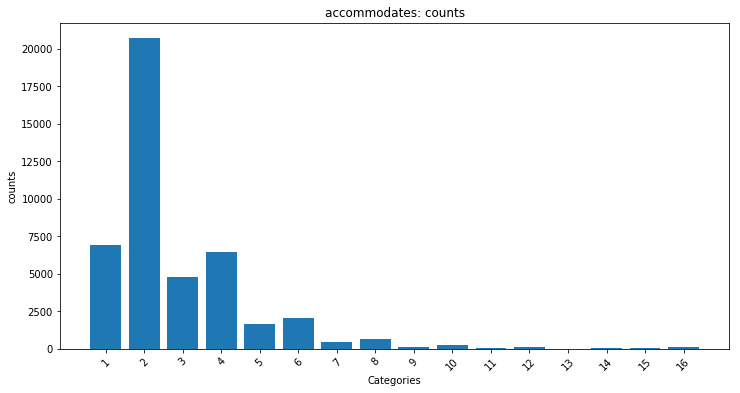

In [44]:
plot_general_distribution(listings_detail, 'accommodates')

In [45]:
len(listings_detail[listings_detail['accommodates'] == 16])

104

For now, we don't make any decisions on the outlying number of accommodates since we believe that the number of accommodates can have a huge impact on the price. I.e. leaving out the listings for 16 accommodates might lead to missing out information. When we map the outliers to e.g. the median or to a maximum allowable value, then this might shift our regression too much. 

###### bathrooms

In [46]:
len(listings_detail.property_type.unique())

28

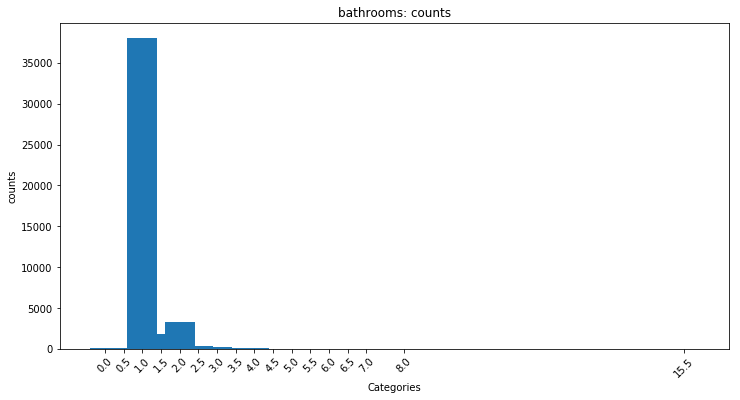

In [47]:
plot_general_distribution(listings_detail, 'bathrooms')

In [48]:
listings_detail['bathrooms'].value_counts(dropna=False)

1.0     38014
2.0      3271
1.5      1874
2.5       374
3.0       264
NaN       144
4.0        97
0.0        84
0.5        80
3.5        62
5.0        18
4.5        14
6.0         8
5.5         5
8.0         5
15.5        1
7.0         1
6.5         1
Name: bathrooms, dtype: int64

In [49]:
# fill na's with the modus
listings_detail['bathrooms'].fillna(1, inplace=True)

# Drop the outlier
listings_detail = listings_detail[listings_detail['bathrooms'] < 15]

###### beds

In [50]:
len(listings_detail.property_type.unique())

28

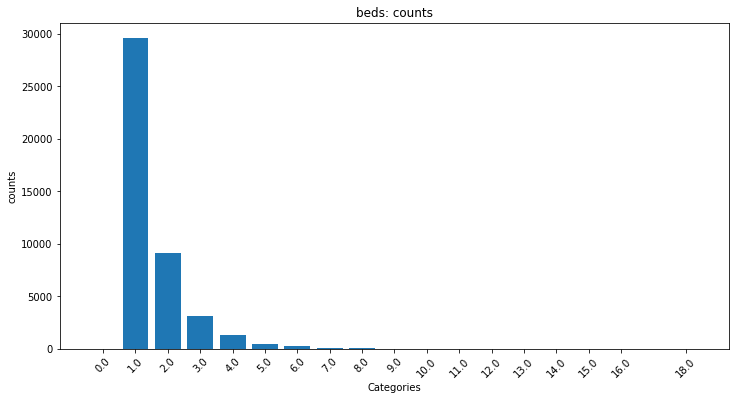

In [51]:
plot_general_distribution(listings_detail, 'beds')

In [52]:
listings_detail['beds'].value_counts(dropna=False)

1.0     29565
2.0      9181
3.0      3156
4.0      1317
5.0       519
6.0       264
NaN        91
7.0        87
8.0        57
10.0       23
9.0        19
12.0        9
11.0        8
13.0        7
16.0        6
18.0        2
0.0         2
15.0        2
14.0        1
Name: beds, dtype: int64

In [53]:
# nans to mode 
listings_detail['beds'].fillna(1, inplace=True)

# throw away the ones without a bed 
listings_detail = listings_detail[listings_detail['beds'] > 0]

# throw away the one with 40 beds
listings_detail = listings_detail[listings_detail['beds'] < 40]

###### bed_type

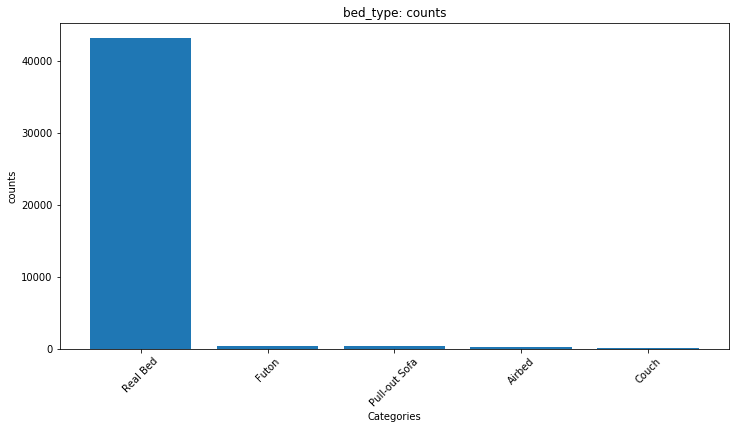

In [54]:
plot_general_distribution(listings_detail, 'bed_type')

###### square_feet 

In [55]:
listings_detail.square_feet.describe()

count     549.000000
mean      727.732240
std       633.253518
min         0.000000
25%       325.000000
50%       700.000000
75%       925.000000
max      5000.000000
Name: square_feet, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018809BA0128>]],
      dtype=object)

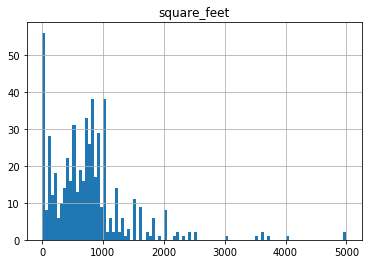

In [56]:
listings_detail.hist(column='square_feet', bins=100)

In [57]:
Q1 = np.percentile(listings_detail["square_feet"], 25)
Q3 = np.percentile(listings_detail["square_feet"], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [58]:
sum(listings_detail["square_feet"].isnull()) /len(listings_detail)

0.9876111386920612

Unfortunately, the field contains a lot of missing values

###### security_deposit 

In [59]:
# Clean security_deposit  
listings_detail['security_deposit'] = listings_detail['security_deposit'].str.replace("$","")
listings_detail['security_deposit'] = listings_detail['security_deposit'].str.replace(",","")
listings_detail.security_deposit  = pd.to_numeric(listings_detail.security_deposit, downcast = 'float')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018808913550>]],
      dtype=object)

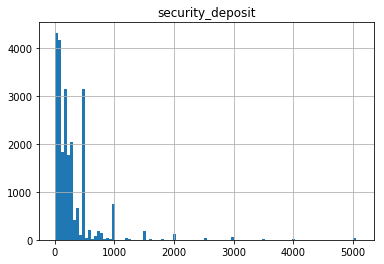

In [60]:
listings_detail.hist(column='security_deposit', bins=100)

In [61]:
listings_detail.security_deposit.describe()

count    23614.000000
mean       293.176453
std        412.680389
min          0.000000
25%        100.000000
50%        200.000000
75%        400.000000
max       5100.000000
Name: security_deposit, dtype: float64

In [62]:
listings_detail.security_deposit.median()

200.0

In [63]:
print(sum(listings_detail['security_deposit'].isnull()))
print(sum(listings_detail['security_deposit'].isnull()) / len(listings_detail))

20700
0.46712100013539737


Almost 50% is missing. We cannot use this field

###### cleaning_fee 

In [64]:
# Clean cleaning_fee  
listings_detail['cleaning_fee'] = listings_detail['cleaning_fee'].str.replace("$","")
listings_detail['cleaning_fee'] = listings_detail['cleaning_fee'].str.replace(",","")
listings_detail.cleaning_fee  = pd.to_numeric(listings_detail.cleaning_fee, downcast = 'float')

In [65]:
# Number NA
print(sum(listings_detail['cleaning_fee'].isnull()))

# Percentage NA
print(sum(listings_detail['cleaning_fee'].isnull()) / len(listings_detail))

12203
0.27537572776097846


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001887FD10BA8>]],
      dtype=object)

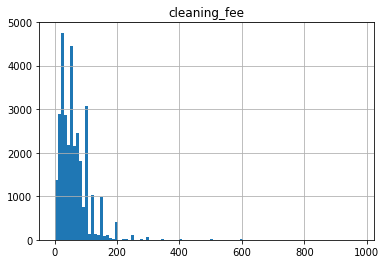

In [66]:
listings_detail.hist(column='cleaning_fee', bins=100)

In [67]:
listings_detail.cleaning_fee.describe()

count    32111.000000
mean        59.791660
std         47.141109
min          0.000000
25%         25.000000
50%         50.000000
75%         80.000000
max        975.000000
Name: cleaning_fee, dtype: float64

We don't use it cause it has a lot of missing values 

###### guests_included 

In [68]:
listings_detail['guests_included'].value_counts(dropna=False)

1     32286
2      8005
4      1934
3      1120
6       409
5       302
8       121
7        49
10       32
12       14
9        13
16       10
14        7
15        6
11        5
13        1
Name: guests_included, dtype: int64

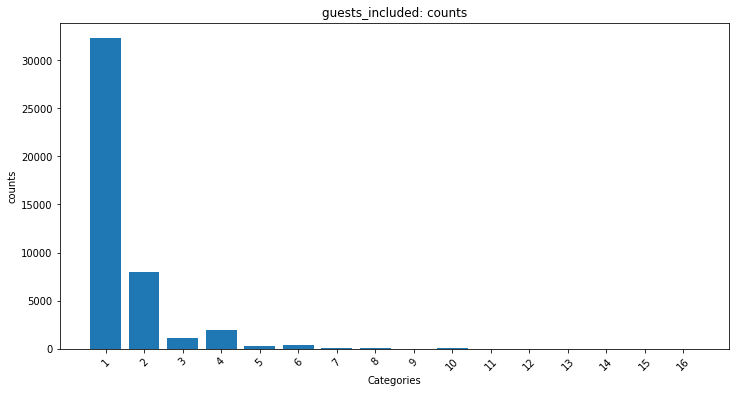

In [69]:
plot_general_distribution(listings_detail, 'guests_included')

In [70]:
# This feature is pretty hard to use

###### extra_people 

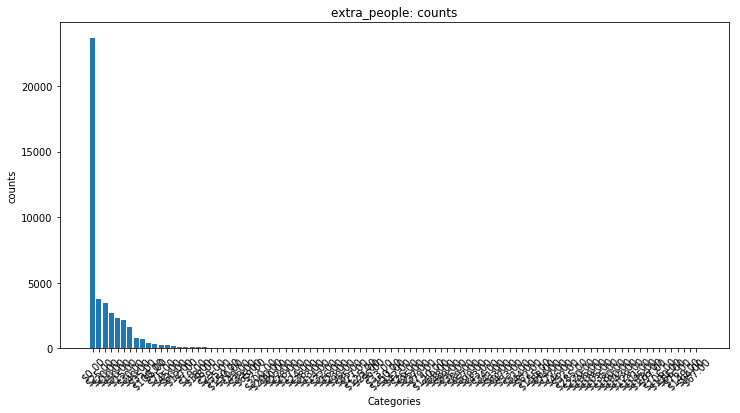

In [71]:
plot_general_distribution(listings_detail, 'extra_people')

In [72]:
# Clean extra_people  
try:
    listings_detail['extra_people'] = listings_detail['extra_people'].str.replace("$","")
    listings_detail['extra_people'] = listings_detail['extra_people'].str.replace(",","")
    listings_detail.extra_people  = pd.to_numeric(listings_detail.extra_people, downcast = 'float')
except: 
    pass

In [73]:
# Number NA
print(sum(listings_detail['extra_people'].isnull()))

# Percentage NA
print(sum(listings_detail['extra_people'].isnull()) / len(listings_detail))

0
0.0


In [74]:
listings_detail.extra_people.describe()

count    44314.000000
mean        13.912308
std         22.940329
min          0.000000
25%          0.000000
50%          0.000000
75%         25.000000
max        300.000000
Name: extra_people, dtype: float64

In [75]:
# Group   (these groups are put together after looking at the data)
val_counts = listings_detail.extra_people.value_counts(dropna=False)
cats = np.array(list(val_counts.keys()))
counts = list(val_counts)
count_df = pd.DataFrame({
    'categories' : cats,
    'counts' : counts
})

freq = {
    '0' : 0, 
    'not 0' : 0
}
for i in range(0,len(count_df.categories)):
    amount = count_df.categories[i]
    if(amount == 0):
        freq['0'] += count_df.counts[i]
    elif(0 < amount):
        freq['not 0'] += count_df.counts[i]

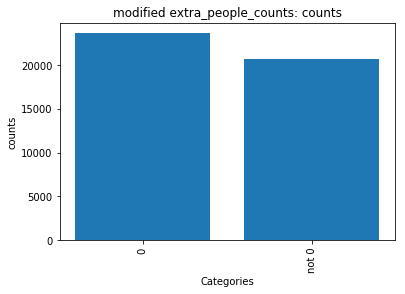

In [76]:
cats = np.array(list(freq.keys()))
counts = list(freq.values())

title = 'modified extra_people_counts' + ': counts'
Ys = counts
Xs = cats
plt.bar(Xs, Ys)
plt.title(title)
plt.xlabel('Categories')
plt.ylabel('counts')
plt.xticks(Xs, Xs, rotation='vertical')
plt.show()

In [77]:
listings_detail['pay_for_extra_people'] = listings_detail['extra_people'].apply(lambda x: 1 if x > 0 else 0)

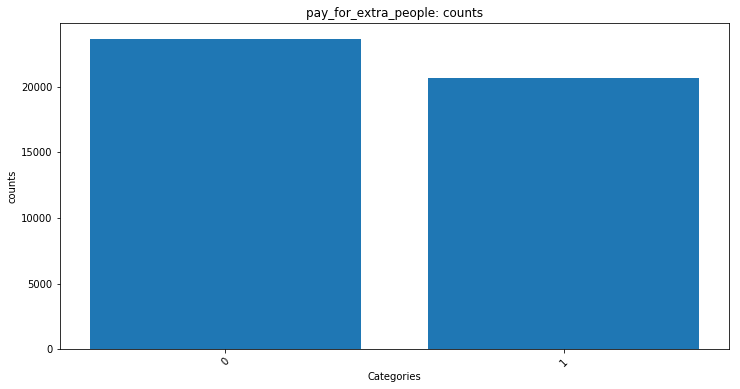

In [78]:
plot_general_distribution(listings_detail, 'pay_for_extra_people')

###### minimum_nights 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001885A8EDA58>]],
      dtype=object)

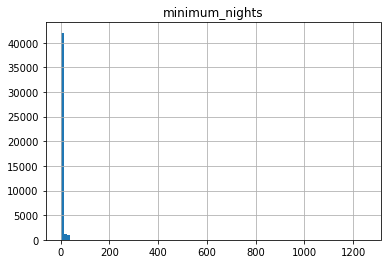

In [79]:
listings_detail.hist(column='minimum_nights', bins=100)

In [80]:
# Hard to make this useful 

###### review_scores_value

In [81]:
listings_detail.review_scores_value.unique()

array([nan, 10.,  9.,  7.,  8.,  6.,  4.,  5.,  2.,  3.])

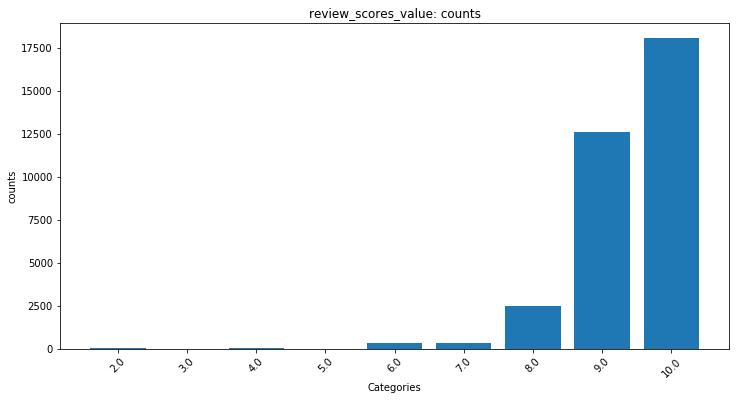

In [82]:
plot_general_distribution(listings_detail, 'review_scores_value')

In [83]:
# Number NA
print(sum(listings_detail['review_scores_value'].isnull()))

# Percentage NA
print(sum(listings_detail['review_scores_value'].isnull()) / len(listings_detail))

10294
0.23229679108182516


A lot of missing values, highly doubtable if we can get info out of this

###### requires_license

In [84]:
listings_detail.requires_license.unique()

array(['f'], dtype=object)

In [85]:
# Not useful 

###### instant_bookable

In [86]:
listings_detail.instant_bookable.unique()

array(['f', 't'], dtype=object)

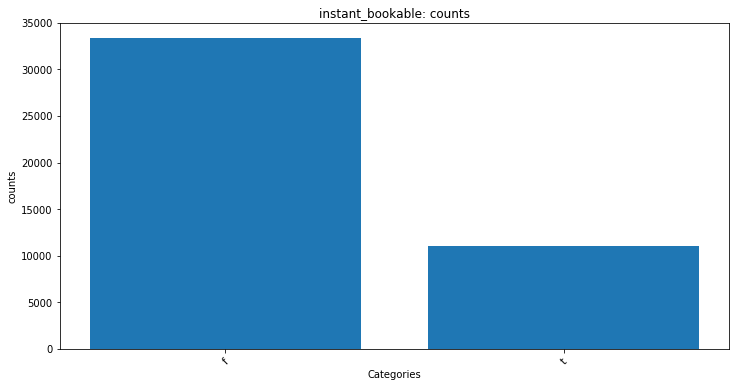

In [87]:
plot_general_distribution(listings_detail, 'instant_bookable')

In [88]:
listings_detail['instant_bookable'] = listings_detail['instant_bookable'].apply(lambda x: 1 if x == 't' else 0)

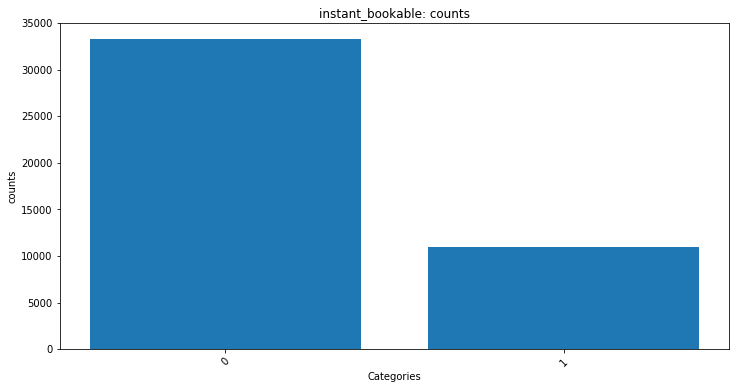

In [89]:
plot_general_distribution(listings_detail, 'instant_bookable')

###### is_business_travel_ready

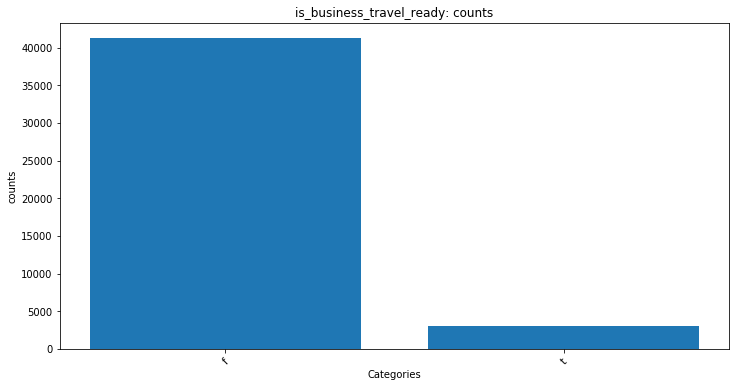

In [90]:
plot_general_distribution(listings_detail, 'is_business_travel_ready')

In [91]:
listings_detail['is_business_travel_ready'] = listings_detail['is_business_travel_ready'].apply(lambda x: 1 if x == 't' else 0)

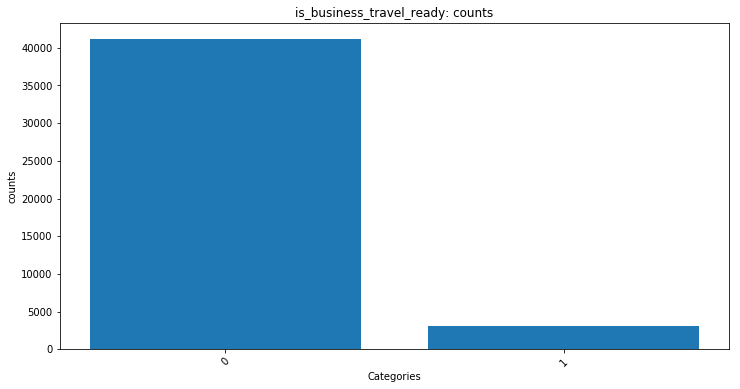

In [92]:
plot_general_distribution(listings_detail, 'is_business_travel_ready')

###### cancellation_policy

In [93]:
listings_detail.cancellation_policy.unique()

array(['strict', 'moderate', 'flexible', 'super_strict_30', 'long_term',
       'super_strict_60'], dtype=object)

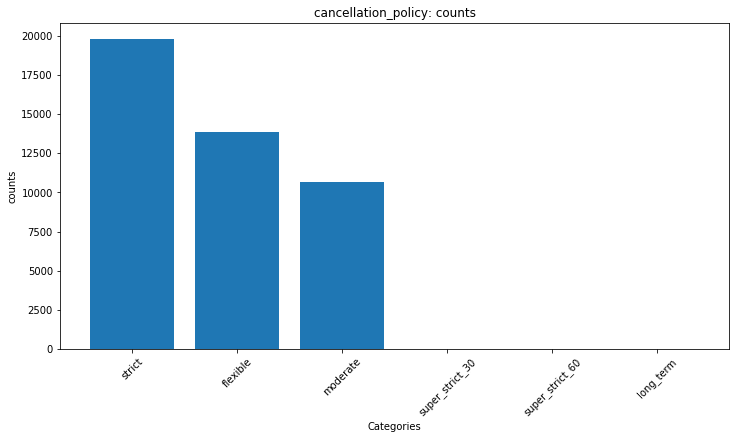

In [94]:
plot_general_distribution(listings_detail, 'cancellation_policy')

In [95]:
# get super strict and long term to strict 
listings_detail['cancellation_policy'][listings_detail['cancellation_policy'] == 'super_strict_30'] = 'strict'
listings_detail['cancellation_policy'][listings_detail['cancellation_policy'] == 'super_strict_60'] = 'strict'
listings_detail['cancellation_policy'][listings_detail['cancellation_policy'] == 'long_term'] = 'strict'

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


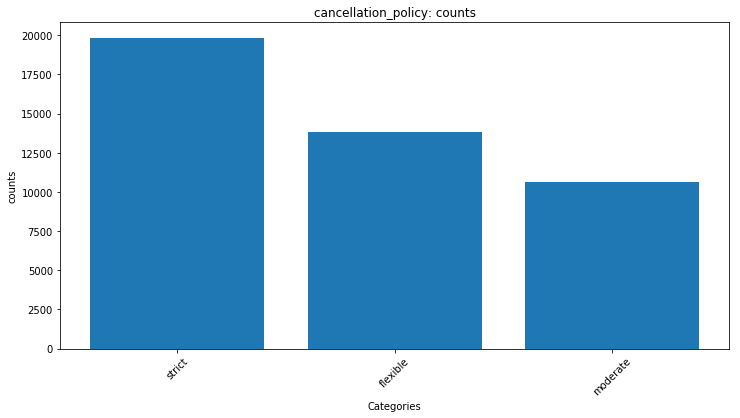

In [96]:
plot_general_distribution(listings_detail, 'cancellation_policy')

In [97]:
listings_detail['canc_pol_is_strict'] = listings_detail['cancellation_policy'].apply(lambda x: 1 if x == 'strict' else 0)
listings_detail['canc_pol_is_lenient'] = listings_detail['cancellation_policy'].apply(lambda x: 1 if x == 'flexible' else 0)

###### require_guest_profile_picture

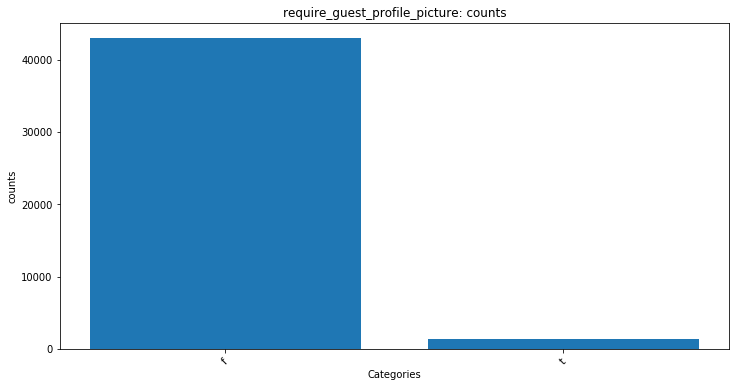

In [98]:
plot_general_distribution(listings_detail, 'require_guest_profile_picture')

###### require_guest_phone_verification

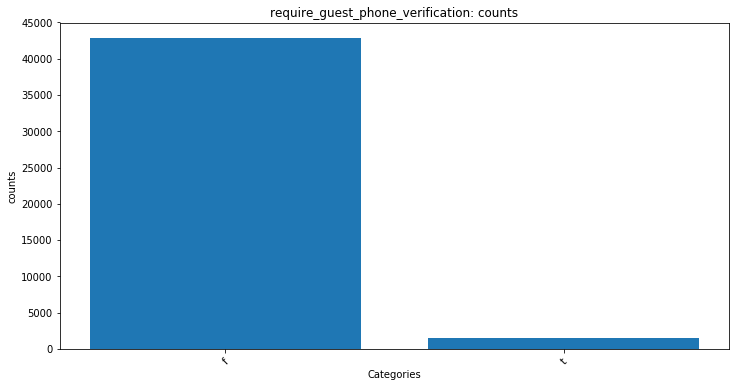

In [99]:
plot_general_distribution(listings_detail, 'require_guest_phone_verification')

In [100]:
# we don't expect a lot from this variable, but we put it into a dummy variable to test it anyway
listings_detail['require_guest_phone_verification'] = listings_detail['require_guest_phone_verification'].apply(lambda x: 1 if x == 't' else 0)

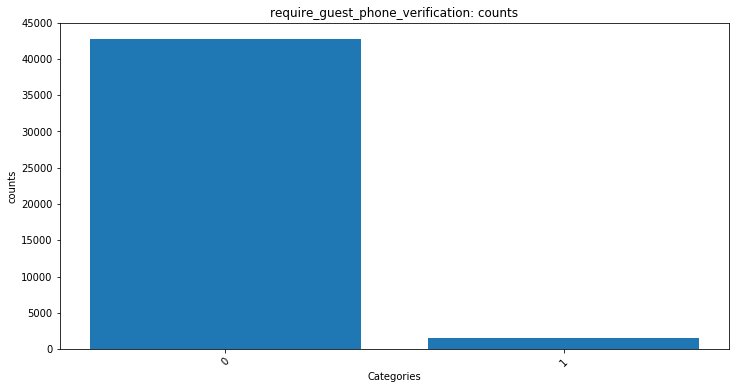

In [101]:
plot_general_distribution(listings_detail, 'require_guest_phone_verification')

###### calculated_host_listings_count

In [102]:
listings_detail.calculated_host_listings_count.unique()

array([ 1,  4,  5,  3,  2,  8,  6,  7,  9, 11, 15, 12, 10, 35, 13, 16, 28,
       31], dtype=int64)

In [103]:
listings_detail.host_listings_count.unique()

array([  1.,   4.,   5.,   3.,   2.,   8.,   6.,   0.,  nan,  12.,  16.,
        11.,   9.,  24.,  14.,   7.,  20.,  15.,  10.,  19.,  47.,  23.,
        22.,  35.,  17.,  13.,  39., 236.,  27., 296.,  94., 979.,  18.,
        31.,  41.,  28., 159.,  46.,  21.,  49., 113.,  38.,  42.,  33.,
       258.,  54., 248.,  25.,  85., 316.,  52.,  64.,  56., 149., 648.,
        83.,  36., 218.])

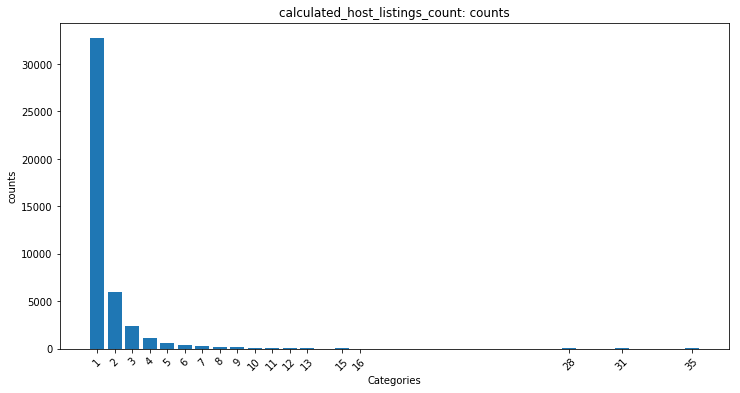

In [104]:
plot_general_distribution(listings_detail, 'calculated_host_listings_count')

In [105]:
# similar to host_listings_count (we calculated this and the values are similar)

###### neighbourhood group

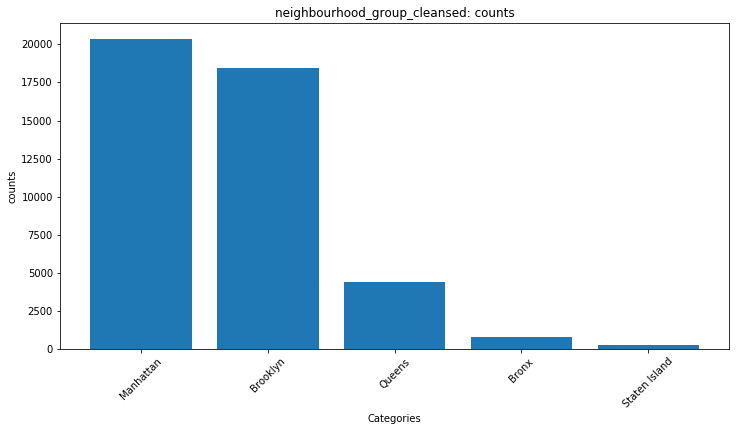

In [106]:
# Plot distribution
plot_general_distribution(listings_detail, 'neighbourhood_group_cleansed')

In [107]:
# Make dummies 
listings_detail['is_Manhattan'] = listings_detail['neighbourhood_group_cleansed'].apply(lambda x: 1 if x == 'Manhattan' else 0)
listings_detail['is_Brooklyn'] = listings_detail['neighbourhood_group_cleansed'].apply(lambda x: 1 if x == 'Brooklyn' else 0)
listings_detail['is_Queens'] = listings_detail['neighbourhood_group_cleansed'].apply(lambda x: 1 if x == 'Queens' else 0)
listings_detail['is_Bronx'] = listings_detail['neighbourhood_group_cleansed'].apply(lambda x: 1 if x == 'Bronx' else 0)
listings_detail['is_Staten_Island'] = listings_detail['neighbourhood_group_cleansed'].apply(lambda x: 1 if x == 'Staten Island' else 0)

###### distance from statue of liberty

In [108]:
clean_dollar(listings_detail, 'price')

already converted


In [109]:
import math
def distance_from_SoL(lat_1_lon_1):
    lat_1_lon_1 = lat_1_lon_1.split(',')
    lat1 = float(lat_1_lon_1[0])
    lon1 = float(lat_1_lon_1[1])
    lat2 =  40.689247
    lon2 = -74.044502
    radius = 3959 # miles

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [110]:
# calculate the distance for every row and flag when bigger than 2
listings_detail['dist_from_SOL'] = 0
listings_detail['lat_lon'] = ['{}, {}'.format(x,y) for x,y in zip(listings_detail.latitude,listings_detail.longitude)]
listings_detail['dist_from_SOL'] = listings_detail['lat_lon'].apply(lambda x: distance_from_SoL(x))
listings_detail['distance_flag'] = listings_detail['dist_from_SOL'].apply(lambda x: 0 if x < 2 else 1)

In [111]:
# Test the outcome of the flagging
listings_detail = listings_detail.sort_values('dist_from_SOL')
print(listings_detail[['dist_from_SOL','distance_flag']].head())
print(listings_detail[['dist_from_SOL','distance_flag']].tail())

       dist_from_SOL  distance_flag
32013       1.551424              0
32005       1.575248              0
32002       1.671550              0
32022       1.703789              0
32004       1.732006              0
       dist_from_SOL  distance_flag
38591      18.115936              1
38592      18.152777              1
38614      18.215858              1
38613      18.240721              1
44298      18.446764              1


In [112]:
# First check: calculate the mean price
mean_prices = listings_detail.groupby('distance_flag').mean()['price']
mean_prices

distance_flag
0    192.311111
1    147.545151
Name: price, dtype: float32

###### distance from Manhattan Bridge

In [113]:
import math
def distance_from_Manhattan_Bridge(lat_1_lon_1):
    lat_1_lon_1 = lat_1_lon_1.split(',')
    lat1 = float(lat_1_lon_1[0])
    lon1 = float(lat_1_lon_1[1])
    lat2 =  40.702626
    lon2 = -73.992734
    radius = 3959 # miles

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [114]:
# calculate the distance for every row and flag when bigger than 2
listings_detail['dist_from_Manhattan_Bridge'] = 0
listings_detail['lat_lon'] = ['{}, {}'.format(x,y) for x,y in zip(listings_detail.latitude,listings_detail.longitude)]
listings_detail['dist_from_Manhattan_Bridge'] = listings_detail['lat_lon'].apply(lambda x: distance_from_SoL(x))

##### Longitude

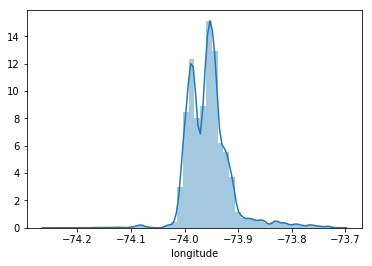

In [115]:
sns.distplot(listings_detail['longitude'])

In [116]:
sum(listings_detail['longitude'].isnull())

0

##### Latitude

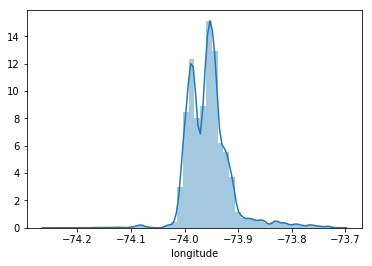

In [117]:
sns.distplot(listings_detail['longitude'])

In [118]:
sum(listings_detail['latitude'].isnull())

0

#### Low availability

In [119]:
sum(listings_detail['availability_365'].isnull())

0

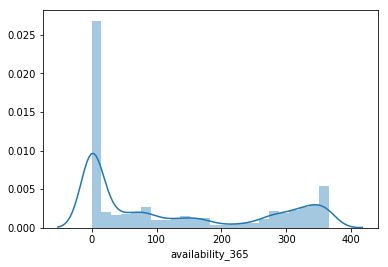

In [120]:
sns.distplot(listings_detail['availability_365'])

## Linear Regression

In [121]:
# import the statsmodel package
import statsmodels.api as sm

In [122]:
clean_dollar(listings_detail, 'price')

already converted


In [284]:
# Choose independent variables

X = listings_detail[[#'is_business_travel_ready',
                     # 'host_is_superhost',
                     #'host_listings_count_calculated',
                     #'host_has_profile_pic',
                     #'host_identity_verified',
                     'is_entire_home_or_apt',
                     #'is_private_room',                       ---> Reference value is a private room
                     'is_shared_room',
                    'accommodates',
                    'bathrooms',
                    'pay_for_extra_people',
                    'instant_bookable',
                    'require_guest_phone_verification',
                    #'distance_flag'
                    #'is_Manhattan',                          
                    'is_Brooklyn',                            
                    'is_Queens',                                                          
                    'is_Bronx',
                    'is_Staten_Island',
                    'beds',
                    'availability_365',
                    #'dist_from_Manhattan_Bridge'
                    ]]
y = listings_detail.price


In [285]:
for feature in X:
    number_missing = sum(listings_detail[feature].isnull())
    if number_missing > 0:
        print(feature)
    else: 
        pass

In [286]:
# add constant
sm.add_constant(X)

model = sm.OLS(y, X).fit()

In [287]:
model.params

is_entire_home_or_apt                55.384399
is_shared_room                      -22.579787
accommodates                         31.418257
bathrooms                           104.146985
pay_for_extra_people                -30.884321
instant_bookable                     -8.379992
require_guest_phone_verification     17.630158
is_Brooklyn                         -63.691812
is_Queens                           -46.671558
is_Bronx                            -24.658646
is_Staten_Island                    -92.055893
beds                                 -6.445496
availability_365                      0.088215
dist_from_Manhattan_Bridge           -6.345493
dtype: float64

In [274]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     3078.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        17:52:24   Log-Likelihood:            -2.9433e+05
No. Observations:               44314   AIC:                         5.887e+05
Df Residuals:                   44301   BIC:                         5.888e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
is_entire_home_or_apt               51.2868      2.029     25.272      0.000      47.309      55.264
is_shared_room                     -30.9918      5.660     -5.475      0.000     -42.086     -19.898
accommodates                        31.7348      0.889     35.690      0.000      29.992      33.478
bathrooms                           81.1238      1.693     47.930      0.000      77.806      84.441
pay_for_extra_people               -37.4364      1.816    -20.614      0.000     -40.996     -33.877
instant_bookable                   -14.2828      2.034     -7.021      0.000     -18.270     -10.296
require_guest_phone_verification    17.6175      4.886      3.605      0.000       8.040      27.195
is_Brooklyn                        -61.6912      1.838    -33.569      0.000     -65.293     -58.089
is_Queens                          -72.9218      3.096    -23.557      0.000     -78.989     -66.855
is_Bronx                           -75.9234      6.757    -11.236      0.000     -89.167     -62.680
is_Staten_Island                   -89.7058     10.936     -8.203      0.000    -111.140     -68.271
beds                                -6.5620      1.456     -4.506      0.000      -9.416      -3.708
availability_365                     0.0688      0.007     10.387      0.000       0.056       0.082
==============================================================================
Omnibus:                   112091.140   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2960968922.819
Skew:                          28.079   Prob(JB):                         0.00
Kurtosis:                    1268.099   Cond. No.                     2.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [275]:
# !pip install shap

# Comprehensive plots

In [276]:
# Plot for neighbourhood groups 
neigh_groups = ['Staten Island','Bronx','Queens','Manhattan']
values = [model.params['is_Staten_Island'],
          model.params['is_Brooklyn'],
          model.params['is_Queens'],
          model.params['is_Bronx']]

In [277]:
model.params['is_Brooklyn']

-61.691179081156825

In [278]:
values = [model.params['is_Staten_Island'] - model.params['is_Brooklyn'],
         model.params['is_Bronx'] - model.params['is_Brooklyn'],
         model.params['is_Queens'] - model.params['is_Brooklyn'],
         0  - model.params['is_Brooklyn']]

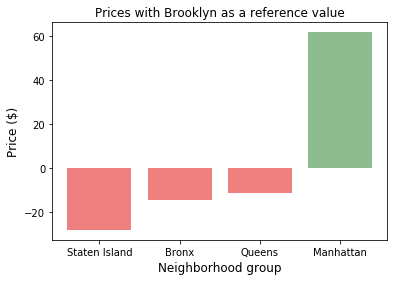

In [279]:
plt.title('Prices with Brooklyn as a reference value')
plt.bar(neigh_groups, values, color = ("lightcoral", 
                                       "lightcoral", 
                                       "lightcoral", 
                                       "darkseagreen"))
plt.xlabel('Neighborhood group', fontsize = 12)
plt.ylabel('Price ($)', fontsize = 12)
plt.show()


In [280]:
# Plot shared room vs entire home vs private room

In [281]:
room_types = ['Shared room','entire home']
values = [model.params['is_shared_room'],
         model.params['is_entire_home_or_apt']]

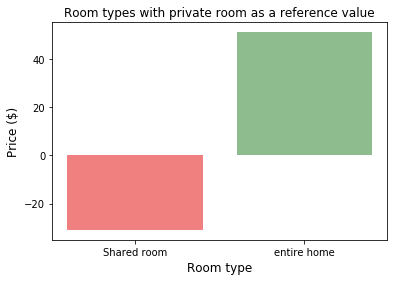

In [282]:
plt.title('Room types with private room as a reference value')
plt.bar(room_types, values, color = ("lightcoral", 
                                       "darkseagreen"))
plt.xlabel('Room type', fontsize = 12)
plt.ylabel('Price ($)', fontsize = 12)
plt.show()

In [283]:
model.params

is_entire_home_or_apt               51.286843
is_shared_room                     -30.991772
accommodates                        31.734840
bathrooms                           81.123821
pay_for_extra_people               -37.436428
instant_bookable                   -14.282772
require_guest_phone_verification    17.617538
is_Brooklyn                        -61.691179
is_Queens                          -72.921813
is_Bronx                           -75.923402
is_Staten_Island                   -89.705836
beds                                -6.561975
availability_365                     0.068786
dtype: float64